In [ ]:
!pip install -e .
!pip install matplotlib

!wget https://storage.googleapis.com/zerospeech-checkpoints/5895-34629-0010.flac

# ZeroSyl Quickstart

In [2]:
import matplotlib.pyplot as plt
import torch
import torchaudio
from IPython.display import Audio

In [3]:
def plot_segments_on_melspec(wav, starts, ends, ids=None):

    tMel = torchaudio.transforms.MelSpectrogram(
        n_fft=1024,
        win_length=400,
        hop_length=320,
    )
    tDB = torchaudio.transforms.AmplitudeToDB(top_db=80)

    n_mels = tMel.n_mels

    melspec = tDB(tMel(wav))[0]

    plt.figure(figsize=(10, 4))
    plt.imshow(melspec, aspect="auto", origin="lower")
    plt.axis("off")

    if ids is None:
        ids = torch.arange(len(starts))

    for start, end, id in zip(starts, ends, ids):
        mid = (start + end) / 2
        plt.axvline(start, c="w")
        plt.axvline(end, c="w")
        plt.text(
            mid,
            n_mels / 2,
            id.item(),
            fontsize=16,
            c="w",
            ha="center",
            va="center",
            rotation=90,
        )

In [4]:
wav, sr = torchaudio.load("5895-34629-0010.flac")

Audio(wav, rate=sr)

/home/nicolvisser/.cache/pypoetry/virtualenvs/zerosyl-Ssh5qGkW-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([ 0, 18, 22, 28, 35, 46, 54, 62, 72, 81, 94])
tensor([ 18,  22,  28,  35,  46,  54,  62,  72,  81,  94, 107])
torch.Size([11, 1024])


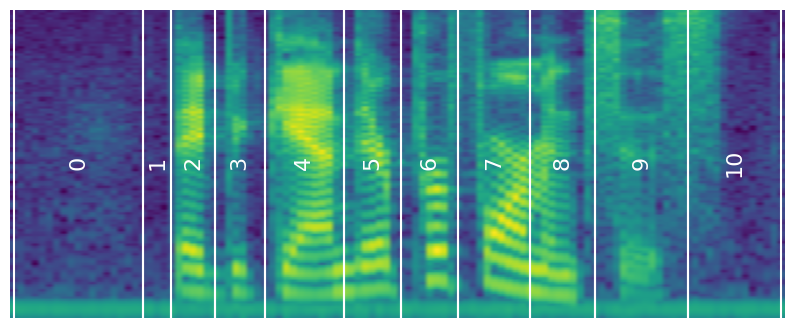

In [5]:
from zerosyl import ZeroSylContinuous

model = ZeroSylContinuous.from_remote()
starts, ends, embeddings = model.encode(wav)

print(starts)
print(ends)
print(embeddings.shape)
plot_segments_on_melspec(wav, starts, ends)

tensor([ 0, 18, 22, 28, 35, 46, 54, 62, 72, 81, 94])
tensor([ 18,  22,  28,  35,  46,  54,  62,  72,  81,  94, 107])
tensor([2856,  503, 9017, 3307, 5905, 4960, 8289, 5426, 1995,  612, 7103])


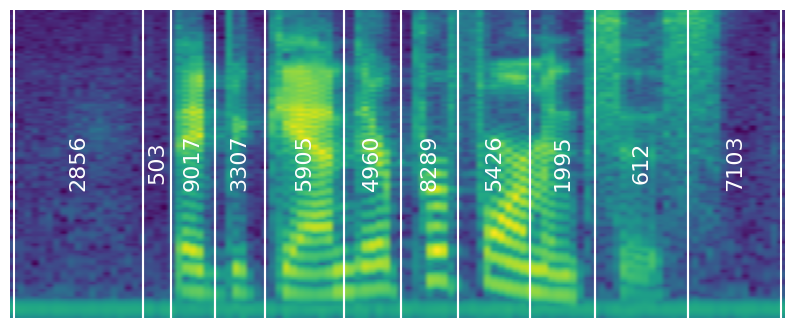

In [6]:
from zerosyl import ZeroSylDiscrete

model = ZeroSylDiscrete.from_remote()
wav, sr = torchaudio.load("5895-34629-0010.flac")
starts, ends, ids = model.encode(wav)

print(starts)
print(ends)
print(ids)
plot_segments_on_melspec(wav, starts, ends, ids)

tensor([ 0, 22, 28, 35, 46, 54, 62, 72, 81, 94])
tensor([ 22,  28,  35,  46,  54,  62,  72,  81,  94, 107])
tensor([9115, 2875, 9052, 1924, 1773, 4732, 2188, 5790, 6117, 9115])


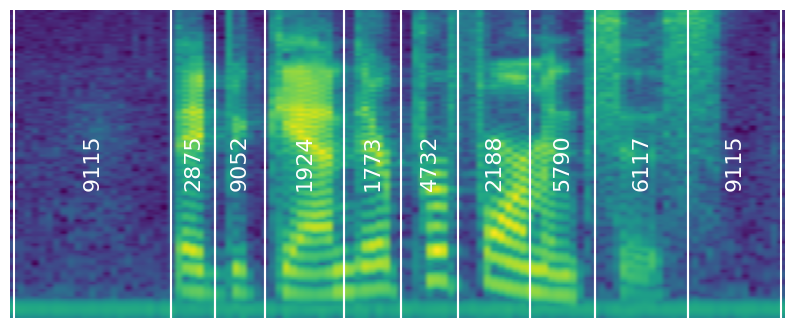

In [7]:
from zerosyl import ZeroSylCollapsed

model = ZeroSylCollapsed.from_remote()
wav, sr = torchaudio.load("5895-34629-0010.flac")
starts, ends, ids = model.encode(wav)

print(starts)
print(ends)
print(ids)
plot_segments_on_melspec(wav, starts, ends, ids)

In [8]:
from zerosyl import LanguageModel

lm = LanguageModel.from_remote()

brick = torch.tensor([9116, 9115, 3045, 9115])
blick = torch.tensor([9116, 9115, 5041, 9115])
print(lm.loglikelihoods([brick, blick]))

Model loaded with 93,633,024 parameters.
[-5.322813510894775, -5.632452011108398]


In [9]:
print(lm.generate(max_length=10))

tensor([[9116, 9115, 6380, 4681, 7064, 6665, 5965, 1016, 9115, 5585]])
